In [1]:
 from pprint import pprint

# 7.2. Линейная регрессия
## УСЛОВИЯ ГАУССА-МАРКОВА
### Условие 1. Корректная спецификация модели.
Это значит, что мы сделали верное предположение о характере зависимости (линейной в нашем случае) и собрали «хорошие» признаки.  

Чтобы пройти этот уровень, обычно делают предварительный анализ данных: строят матрицу корреляций для поиска «хороших» признаков, избавляются от мультиколлинеарности в многофакторных моделях и строят диаграммы рассеяния, чтобы наглядно убедиться в том, что линейность есть или нет.
### Условие 2. Признак $X$ должен быть детерминированной величиной, отличной от константы.
Иными словами, все $X$ не случайны и не все равны друг другу.

Неслучайность нужна для последующего статистического анализа OLS оценок коэффициентов $β_i$.
### Условие 3. Ожидаемое (среднее) значение отклонений нулевое

$$E(\varepsilon_i)=0$$
Это значит, что ошибки не носят систематического характера, т.е. у них нет постоянной составляющей. На самом деле роль постоянной составляющей $\varepsilon$ забирает на себя коэффициент $β_0$, поэтому регрессии с константой часто предпочтительнее, чем регрессии без константы.
### Условие 4. Гомоскедастичность: разброс отклонений в среднем одинаковый для всех наблюдений

$$\sigma ^2(\varepsilon_i)=const$$
Иными словами, это значит, что разброс ошибок в среднем одинаков для всех наблюдений.
### Условие 5. Независимость ошибок.
$$cov(\varepsilon_i, \varepsilon_j)=corr(\varepsilon_i, \varepsilon_j)=0, i\neq j$$
Это означает, что измерения $Y$ будут независимы друг от друга. Т.е. если какое-то одно случайно имеет большую ошибку, это не повлечёт за собой систематического увеличения ошибки у других наблюдений. Проще говоря, положительные и отрицательные значения ошибок должны быть хаотично перемешаны.

**Все вместе условия Гаусса-Маркова гарантируют нам «хорошие» оценки для параметров модели $\beta _0, \beta _1$ и высокое качество прогноза.**  
«Хорошие» здесь означает, что они:
- несмещённые, 
- состоятельные 
- и эффективные (обладают наименьшим разбросом среди всех остальных несмещённых оценок).




$Y_i$

### Задание 7.2.3
1. Является ли белым шумом следующий процесс: в каждый момент времени подбрасывается идеальная монета. $\varepsilon_i=1$, если выпал орел, и $0$, если решка.

2. Будет ли белым шумом описанный выше процесс, если монетка неидеальная: $P(«орел») = 0.7$?

3. Является ли белым шумом процесс, в котором $\varepsilon_i:N(0,1)$ и независимы между собой?

4. Является ли белым шумом процесс, в котором $\varepsilon_i:N(0,i)$ и независимы между собой?

5. Является ли белым шумом процесс, в котором $\varepsilon_i:N(0,5^2)$ и независимы между собой?

6. В каких процессах из 1-5 присутствует гетероскедастичность?

7. Какой процесс из 1-5 можно сделать белым шумом, если добавить или вычесть из него константу?

# 7.3. Практика. Линейная регрессия
В этом разделе мы познакомимся с генерацией нормального белого шума и посмотрим на практике, как влияет на качество OLS оценок гетероскедастичность.

ЗАДАНИЕ

→ Загрузите датасет `BostonHousing` из библиотеки `sklearn` (с ним мы работали ранее).

→ Обучите линейную регрессию стоимости дома на параметры $CRIM$, $RM$.

→ Выполните задания ниже.

In [2]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score

boston = load_boston()

In [3]:
print(boston.DESCR[boston.DESCR.find(':Attribute'):boston.DESCR.find(':Missing')])

:Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    


In [4]:
X, y = boston.data[:,[0,5]], boston.target

lr = LinearRegression()

lr.fit(X,y)
y_pred = lr.predict(X)

### Задание 7.3.1 
Выведите коэффициенты модели, округлив ответ до сотых:

In [5]:
print('{}  {}  {}'.format(*lr.coef_.round(2), round(lr.intercept_,2)))

-0.26  8.4  -29.3


### Задание 7.3.2 
Найдите долю объясненной дисперсии.

In [6]:
round(r2_score(y,y_pred),2)

0.54

### Задание 7.3.3 
Сгенерируйте вектор белого шума и добавьте к исходным значениям целевой переменой. Обучите модель и найдите $R^2$ (долю объясненной дисперсии). 

In [7]:
N = X.shape[0]
mu = 0
sigma = 1 

eps = np.random.normal(mu, sigma, size=N)
y_eps = boston.target + eps

lr_eps = LinearRegression()

lr_eps.fit(X,y_eps)
y_pred_eps = lr_eps.predict(X)

In [8]:
round(r2_score(y_eps,y_pred_eps),2)

0.53

### Задание 7.3.4 
Сгенерируйте вектор гетероскедастичного шума аналогично разобранному примеру с параметром $\alpha=1.002
$ и добавьте к исходным значениям целевой переменной. Обучите модель и найдите $R^2$ (долю объясненной дисперсии).


In [9]:
# создадим функцию, которая будет портить белый шум, добавляя в него неравные дисперсии.
# Кажое следующее значение шума будет в alpha раз выше предыдущего

def hetero_eps(alpha, eps):
    hetero_eps = np.zeros(len(eps))
    for i in range (0,len(eps)):
        hetero_eps[i] = (alpha**i) * eps[i]
    return hetero_eps

In [10]:
alpha = 1.002
heteps = hetero_eps(alpha,eps) # гетероскедастичный шум

y_heteps = boston.target + heteps

lr_heteps = LinearRegression()

lr_heteps.fit(X,y_heteps)
y_pred_heteps = lr_heteps.predict(X)

In [11]:
round(r2_score(y_heteps,y_pred_heteps),2)

0.52

### Задание 7.3.5 
В каком случае  (доля объясненной дисперсии) получается лучше?

### Задание 7.3.6 
Сгенерируйте вектор гетероскедастичного шума аналогично разобранному примеру с параметром $\alpha=0.998
$ и добавьте к исходным значениям целевой переменной. Обучите модель и найдите $R^2$ (долю объясненной дисперсии).

In [12]:
alpha = 0.998
heteps = hetero_eps(alpha,eps) # гетероскедастичный шум

y_heteps = boston.target + heteps

lr_heteps = LinearRegression()

lr_heteps.fit(X,y_heteps)
y_pred_heteps = lr_heteps.predict(X)

In [13]:
round(r2_score(y_heteps,y_pred_heteps),2)

0.54

In [14]:
r2_score(y_eps,y_pred_eps), r2_score(y_heteps,y_pred_heteps)

(0.5334961457403065, 0.536448388293556)

### Задание 7.5.2 
5. Вычислите значения скользящего среднего по правилу $MA_t=0.7x_t+0.3x_{t-1}$ для ряда  $x_0=1, x_1=2, x_2=3, x_3=4, x_4=5, x_5=6$

In [15]:
row = [1,2,3,4,5,6]

In [16]:
for i in range(1,len(row)):
    print (0.7*row[i] + 0.3*row[i-1])

1.7
2.6999999999999997
3.6999999999999997
4.7
5.699999999999999


### Задание 7.5.5 
1. Для ряда $x=(1, 0, 1, -1, 2, 0, 1)$ . Вычислите ряд скользящих средних с шириной окна 3 и весами $0.5, 0.3, 0.2$.


In [17]:
row = [1,0,1,-1,2,0,1]

In [18]:
for i in range(2,len(row)):
    print (round(0.5*row[i] + 0.3*row[i-1] + 0.2*row[i-2],15))

0.7
-0.2
0.9
0.4
0.9


In [19]:
round(0.8999999999999999,5)

0.9

# 7.6. Практика. Скользящее среднее
Загрузите датасет `solarpower_cumuldaybyday2.csv`.  
В нём содержится информация о производстве энергии солнечными батареями.

→ Агрегируйте данные по неделям.

→ Выполните задания ниже.
### Задание 7.6.1 
Постройте ряд еженедельного производства энергии, вычислив приращения полученного недельного ряда. В поле для ответа введите значение произведенной энергии за неделю с **6** по **12 октября 2014**, округлив до целых.


In [20]:
import pandas as pd

In [21]:
'''df = pd.read_csv('Unit_7_data/solarpower_cumuldaybyday.csv').drop(columns='Unnamed: 2')

df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y') 
df.index = pd.DatetimeIndex(df['date'])
df.drop(columns = 'date', inplace=True)

df_week = df.resample('W').sum()

df_week['energy_production'] = df_week.cum_power.diff()
df_week.energy_production.iloc[0] = df_week.cum_power.iloc[0]

answer = round(df_week.energy_production.loc[pd.DatetimeIndex(['2014-10-12'])])
answer''';

In [43]:
df = pd.read_csv('Unit_7_data/solarpower_cumuldaybyday.csv')

date = pd.to_datetime(df['date'], format = '%d/%m/%Y')
cum_power = df.cum_power
cum_power.index = pd.DatetimeIndex(date)
cum_power_week = cum_power.resample('W').last()
prod_power_week = cum_power_week.diff()
prod_power_week.iloc[0] = cum_power_week.iloc[0]

round(prod_power_week.loc[pd.DatetimeIndex(['2014-10-12'])])

2014-10-12    44.0
Name: cum_power, dtype: float64

Постройте ряд скользящего среднего для размера окна 4. Сколько элементов в ряде скользящего среднего?

In [47]:
# week_MA = df_week.energy_production.rolling(window = 4).mean() #.dropna(axis=0)
# len(week_MA)
ma = prod_power_week.rolling(window = 4).mean()
len(ma)

366

Найдите значение ряда скользящего среднего с шириной окна $4$ для $t = 120$

In [48]:
ma.iloc[121],ma.iloc[120],ma.iloc[119]

(29.0, 23.25, 21.5)

# 7.8. Практика. Тренд и сезонность
Сделайте декомпозицию на тренд, сезонность и остатки данных из конфетного датасета candy_production.csv.


In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt

In [50]:
candy = pd.read_csv('Unit_7_data/candy_production.csv')

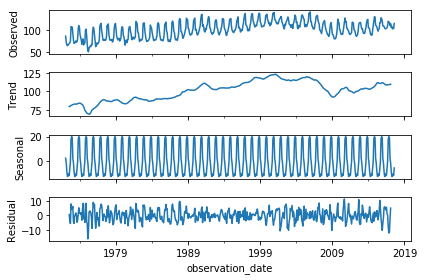

In [51]:
candy_prod = candy.IPG3113N
candy_prod.index = pd.to_datetime(candy.observation_date, format = '%Y/%m/%d')
decomposition = seasonal_decompose(candy_prod, model='additive') 

decomposition.plot()
plt.show()

In [52]:
trend_part = decomposition.trend # отдельно трендовая составляющаяя
seasonal_part = decomposition.seasonal # отдельно сезонная составляющаяя
residual_part = decomposition.resid # отдельно шум: то, что осталось

# residual_part = residual_part.dropna()

### Задание 7.8.1
1. Сколько элементов содержит исходный датасет?

In [53]:
candy.shape

(548, 2)

2. Сколько элементов содержит шумовая часть?

In [54]:
residual_part.shape

(548,)

3. Сколько числовых элементов содержит шумовая часть?

In [55]:
residual_part.dropna().shape

(536,)

4. Сколько элементов содержит сезонная часть?

In [56]:
seasonal_part.shape

(548,)

5. Сколько числовых элементов содержит сезонная часть?

In [57]:
seasonal_part.dropna().shape

(548,)

# 7.10. Практика. Нестационарность

In [58]:
import random
import statsmodels.api as sm

### Задание 7.10.1
Сгенерируйте 100 значений временного ряда по правилу $X_t=0.2X_{t-1}+0.1X_{t-2}+ \varepsilon_t$.

В качестве шумовой компоненты возьмите нормальный белый шум с нулевым средним и единичной дисперсией.

Постройте его график.

Проверьте его на стационарность по критерию Дикки-Фуллера:

In [59]:
# num - число шагов
# mu, sigma - параметры шума
def get_timeseries(num, mu=0, sigma=1):
    eps = np.random.normal(mu, sigma, size=num)
    walk = np.zeros(num)
    walk[0], walk[1] = eps[0], eps[0]
    for i in range (2,num):
        walk[i] = 0.2*walk[i-1] + 0.1*walk[i-2] + eps[i]
    return walk

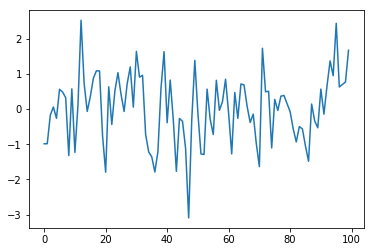

In [60]:
timeseries = get_timeseries(100)

plt.plot(timeseries)

In [61]:
test = sm.tsa.adfuller(timeseries)
print ('p-value: ', test[1])

p-value:  6.017378734086857e-10


Сгенерируйте 100 значений временного ряда по правилу $X_t=0.9X_{t-1}+0.07X_{t-2}+ \varepsilon_t$.

В качестве шумовой компоненты возьмите нормальный белый шум с нулевым средним и единичной дисперсией

Постройте его график.

Проверьте его на стационарность по критерию Дикки-Фуллера:

In [62]:
def get_timeseries_2(num, mu=0, sigma=1):
    eps = np.random.normal(mu, sigma, size=num)
    walk = np.zeros(num)
    walk[0], walk[1] = eps[0], eps[0]
    for i in range (2,num):
        walk[i] = 0.9*walk[i-1] + 0.07*walk[i-2] + eps[i]
    return walk

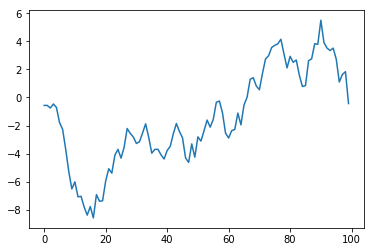

In [63]:
timeseries_2 = get_timeseries_2(100)

plt.plot(timeseries_2)

In [64]:
test = sm.tsa.adfuller(timeseries_2)
print ('p-value: ', test[1])

p-value:  0.6539624105166675


# 7.14. Практика. ACF и PACF
Загрузите датасет AirPassengers.csv.

In [80]:
airpass = pd.read_csv('Unit_7_data/AirPassengers.csv')

airpass.columns = (['Month','Pass'])
airpass.index = pd.DatetimeIndex(airpass.Month)

plt.figure(figsize=(17,5))
plt.plot(airpass.Pass)

### Задание 7.14.1
Постройте полную и частичную коррелограмму данных о пасажиропотоке.

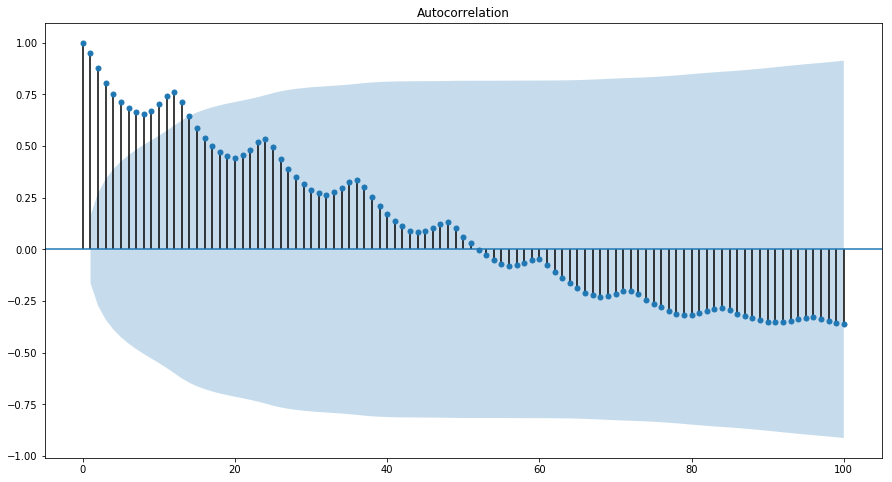

In [92]:
plt.figure(figsize=(15,8))
ax = plt.subplot(111)
sm.graphics.tsa.plot_acf(airpass.Pass,lags=100,ax=ax)
plt.show()


C:\Users\Samsung\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


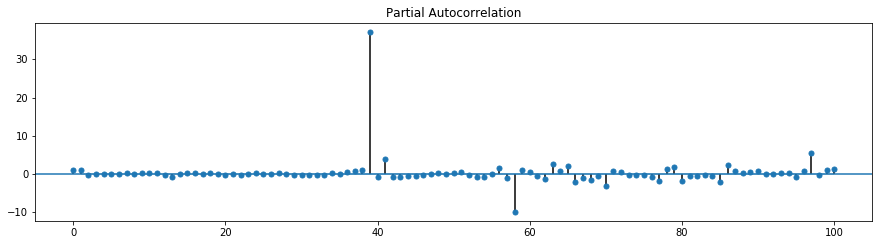

In [93]:
plt.figure(figsize=(15,8))
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(airpass.Pass,lags=100,ax=ax)
plt.show()

1. На какой из коррелограмм видна сезонность?

ACF

2. Судя по тесту Дикки-Фуллера, является ли ряд стационарным? (В качестве порога возьмите значение $p-value=0.05$)

In [97]:
test = sm.tsa.adfuller(airpass.Pass)
print ('p-value: ', test[1])

p-value:  0.991880243437641


### Задание 7.14.2
Постройте полную и частичную коррелограмму первых разностей данных о пасажиропотоке.

In [106]:
pass_dif_1 = airpass.Pass.diff().dropna()

1. Судя по тесту Дикки-Фуллера, является ли ряд первых разнностей стационарным? (В качестве порога возьмите значение $p-value=0.05$)

In [107]:
test = sm.tsa.adfuller(pass_dif_1)
print ('p-value: ', test[1])

p-value:  0.05421329028382789


2. Судя по коррелограммам, присутствует ли сезонность в ряде первых разностей?

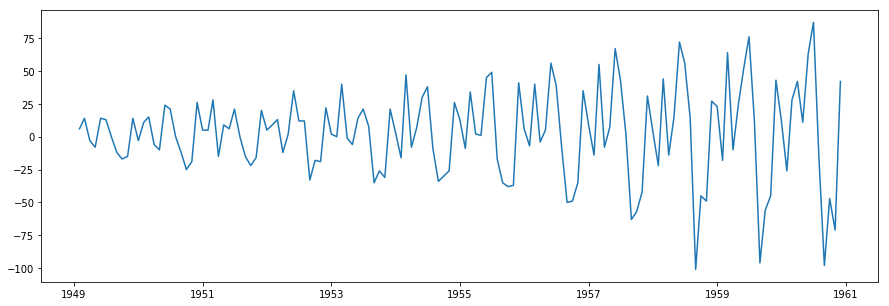

In [104]:
plt.figure(figsize=(15,5))
plt.plot(pass_dif_1)

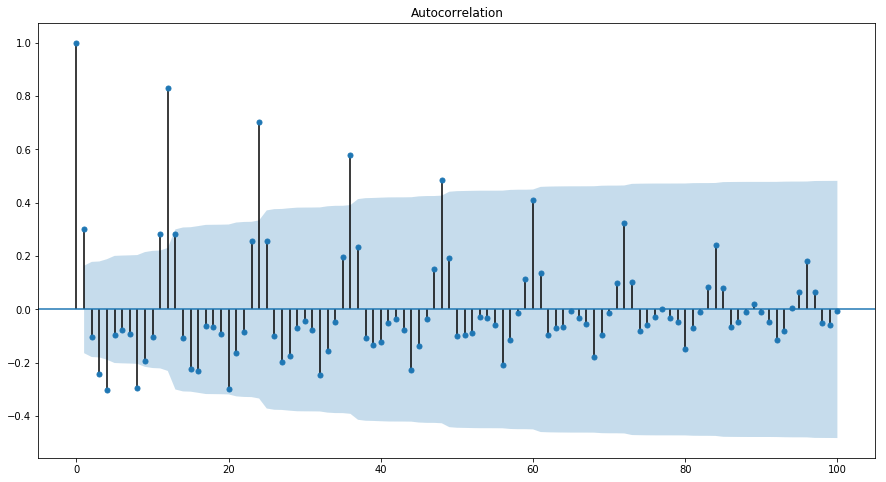

In [102]:
plt.figure(figsize=(15,5))
ax = plt.subplot(111)
sm.graphics.tsa.plot_acf(pass_dif_1,lags=100,ax=ax)
plt.show()

C:\Users\Samsung\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


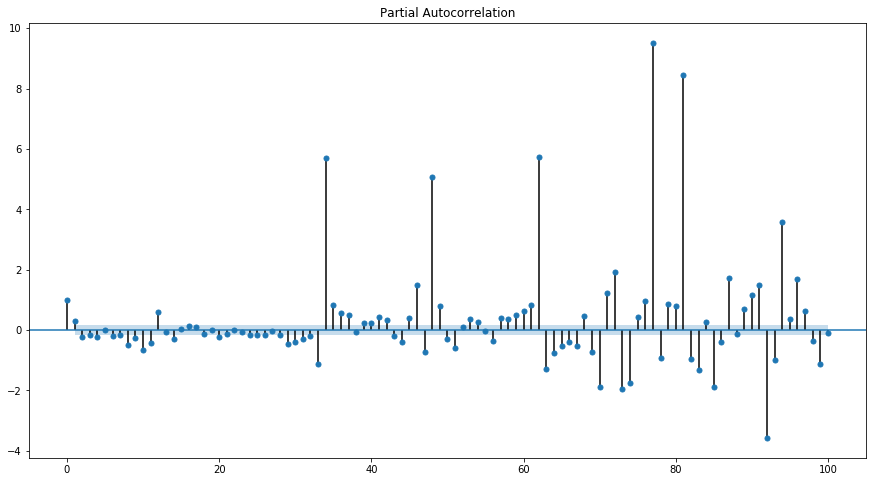

In [103]:
plt.figure(figsize=(15,5))
ax = plt.subplot(111)
sm.graphics.tsa.plot_pacf(pass_dif_1,lags=100,ax=ax)
plt.show()

### Задание 7.14.3
Постройте полную и частичную коррелограмму вторых разностей данных о пасажиропотоке.

In [109]:
pass_dif_2 = pass_dif_1.diff().dropna()

1. Судя по тесту Дикки-Фуллера, является ли ряд вторых разнностей стационарным? (в качестве порога возьмите значение $p-value=0.05$)

In [110]:
test = sm.tsa.adfuller(pass_dif_2)
print ('p-value: ', test[1])

p-value:  2.7328918500141235e-29


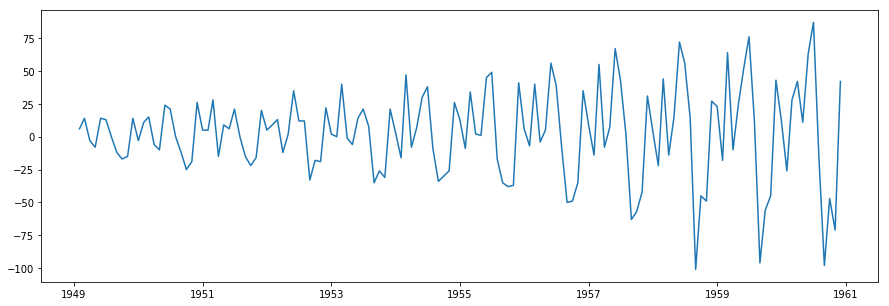

In [113]:
plt.figure(figsize=(15,5))
plt.plot(pass_dif_1)

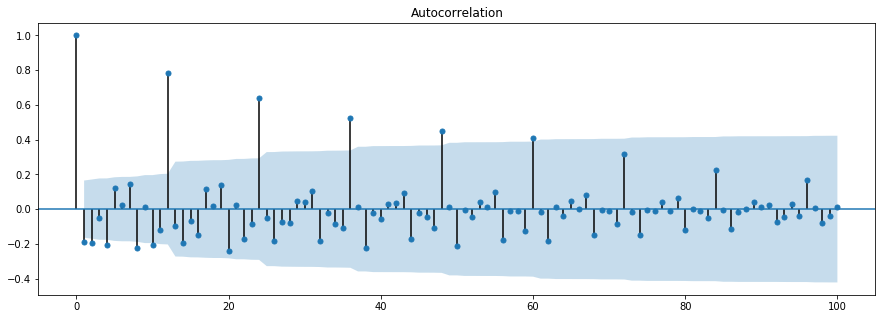

In [112]:
plt.figure(figsize=(15,5))
ax = plt.subplot(111)
sm.graphics.tsa.plot_acf(pass_dif_2,lags=100,ax=ax)
plt.show()

C:\Users\Samsung\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


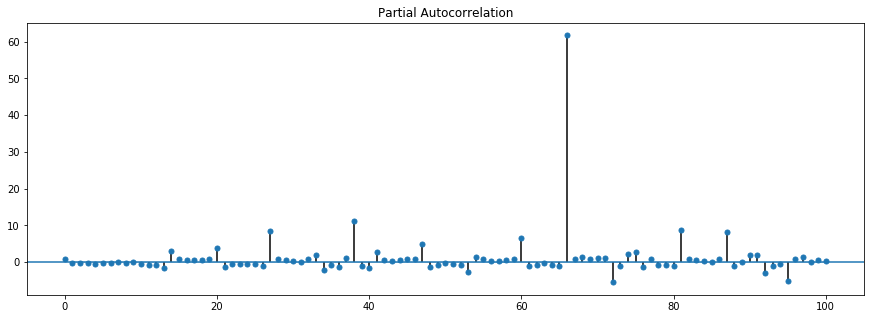

In [111]:
plt.figure(figsize=(15,5))
ax = plt.subplot(111)
sm.graphics.tsa.plot_pacf(pass_dif_2,lags=100,ax=ax)
plt.show()

# ПОДВАЛ

In [45]:
df_week.loc[pd.DatetimeIndex(['2014-10-12'])]

,cum_power
2014-10-12,81898.0


In [105]:
df_week.shape

(366, 2)

In [ ]:
pd.Series

$\alpha$